## Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import umap.umap_ as umap
from sklearn.metrics import davies_bouldin_score
%config InlineBackend.figure_format = 'svg'
import random

In [2]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from scipy.stats import f_oneway

## Import the dataset

In [3]:
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data_with_target=pd.read_excel('Customer care Preprocessed dataset.xlsx')

In [4]:
data_with_target

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


In [5]:
data=data_with_target.drop(["Churn?"],axis=1)

In [6]:
data

,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


## Feature types

In [7]:
data.columns

Index(['Account Length', 'Int'l Plan', 'VMail Plan', 'VMail Message',
       'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins',
       'Intl Calls', 'Intl Charge', 'CustServ Calls'],
      dtype='object')

In [8]:
cont_list=['Account Length', 'VMail Message',  'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
       'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Charge']
ord_list=['Intl Calls', 'CustServ Calls']
nom_list=['Int\'l Plan', 'VMail Plan']

## Necessary Functions

In [9]:
from numba import jit

@jit(nopython=True)
def modified_canberra(a,b):
    return np.sqrt(np.sum(np.array([np.abs(1.0 - x) / (1.0 + np.abs(x)) for x in (np.abs(a-b) + 1.0)])))

In [10]:
def UMAP(UMAP_neb, min_dist_UMAP, metr, data, visual):
    import umap.umap_ as umap
   
    np.random.seed(42)
    colors_set1 = ["burlywood", "lightseagreen", "mediumorchid", "orange", "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    data_embedded = umap.UMAP(n_neighbors=UMAP_neb, min_dist=min_dist_UMAP, n_components=2, metric=metr, random_state=0).fit_transform(data)
    data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
    data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
    result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])
    if visual==1:
        sns.lmplot( x="UMAP_0", y="UMAP_1",data=result,fit_reg=False,legend=False,scatter_kws={"s": 10},palette=customPalette_set1) # specify the point size
        #plt.savefig('clusters_umap_all.png', dpi=700, bbox_inches='tight')
        plt.show()
    else:
        pass
    return result

In [11]:
### FDC parameters is a 2-d list
### each row is for cont ord and nom features
### each entry in each row is for UMAP_neb,min_dist_UMAP, metric

def FDC(data, cont_list, nom_list, ord_list, FDC_parameters, drop_nominal, visual):
    np.random.seed(42)

    
    colors_set1 = ["burlywood", "lightcoral", "lightseagreen", "mediumorchid", "orange", "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    
    cont_df=data[cont_list]
    nom_df=data[nom_list]
    ord_df=data[ord_list]
    cont_emb=UMAP(FDC_parameters[0][0],FDC_parameters[0][1], FDC_parameters[0][2], cont_df, 0) #Reducing continueous features into 2dim
    ord_emb=UMAP(FDC_parameters[1][0],FDC_parameters[1][1], FDC_parameters[1][2], ord_df, 0) #Reducing ordinal features into 2dim
    nom_emb=UMAP(FDC_parameters[2][0],FDC_parameters[2][1], FDC_parameters[2][2], nom_df, 0) #Reducing nominal features into 2dim
    
    if drop_nominal==1:
        result_concat=pd.concat([ord_emb, cont_emb, nom_emb.drop(['UMAP_1'],axis=1)],axis=1) #concatinating all reduced dimensions to get 5D embeddings(1D from nominal)
    else:
        result_concat=pd.concat([ord_emb, cont_emb, nom_emb],axis=1)
    data_embedded = umap.UMAP(n_neighbors=10, min_dist=0.01, n_components=2, metric='euclidean', random_state=42).fit_transform(result_concat) #reducing 5D embeddings to 2D using UMAP
    result_reduced = pd.DataFrame(data = data_embedded , 
        columns = ['FDC_0', 'FDC_1'])
    
    if visual==1:
        sns.lmplot( x="FDC_0", y="FDC_1",data=result_reduced,fit_reg=False,legend=False,scatter_kws={"s": 10},palette=customPalette_set1) # specify the point size
        plt.show()
        #plt.savefig('clusters_umap_all.png', dpi=700, bbox_inches='tight')
    else:
        pass
    return result_reduced #returns both 5D and 2D embeddings

In [12]:
## Clustering parameters is a list of parameters for each clustering algorithms that will be unpacked inside the function
## if clustering_algorithm is DBSCAN clustering_parameters {"eps":value, "min_samples":value}
## if clustering_algorithm is KMEANS clustering_parameters {"n_clusters":value}
## if clustering_algorithm is AGGLO clustering_parameters {"n_clusters":value, "metric":value, "linkage":value}
## algo_dim_reduction has two values UMAP and FDC

def Clustering(low_d_embedding, algo_dim_reduction, clustering_parameters, clustering_algorithm, visual):
    np.random.seed(42)
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import DBSCAN
    from sklearn.cluster import KMeans
    from sklearn.cluster import AgglomerativeClustering
    
    colors_set1 = ["burlywood", "lightcoral", "lightseagreen", "mediumorchid", "orange",  "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    
    if clustering_algorithm=="DBSCAN":
        clustering = DBSCAN(eps=clustering_parameters["eps"], min_samples=clustering_parameters["min_samples"]).fit(low_d_embedding)
    
    elif clustering_algorithm=="KMEANS":
        clustering = KMeans(n_clusters=clustering_parameters["n_clusters"], random_state=42).fit(low_d_embedding)
    
    elif clustering_algorithm=="AGGLO":
        clustering = AgglomerativeClustering(n_clusters=clustering_parameters["n_clusters"], metric=clustering_parameters["metric"], linkage=clustering_parameters["linkage"]).fit(low_d_embedding)
        
    else:
        return (print ("Invalid Clusering Algorithm Name"))
    
    clusters=clustering.fit_predict(low_d_embedding)
    (values,counts) = np.unique(clusters,return_counts=True)
    low_d_embedding['Cluster'] = clusters
    
    
    if visual==1:
        sns.lmplot( x=algo_dim_reduction+"_0", y=algo_dim_reduction+"_1",
        data=low_d_embedding,
        fit_reg=False, 
        legend=True,
        hue='Cluster', # color by cluster
        scatter_kws={"s": 10},palette=customPalette_set1) # specify the point size
        plt.savefig(clustering_algorithm+'.png', dpi=700, bbox_inches='tight')
        plt.show()
    else:
        pass
    
    cluster_labels=low_d_embedding.Cluster.to_list()
    
    if len(np.unique(np.array(cluster_labels)))>1:
        silhouette_score=silhouette_score(low_d_embedding,cluster_labels)
    else:
        silhouette_score=0
        
    return cluster_labels,counts,silhouette_score

In [13]:
def db_score(data,features):
    score=davies_bouldin_score(X=data,labels=features)
    return score

In [14]:
def parameter_optimization_UMAP_KMEANS(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        n_clusters_sample=random.choice(n_clusters)

        
        UMAP_emb=UMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, 0)
        
        cluster_labels, counts, sil_score=Clustering(UMAP_emb, "UMAP", {"n_clusters":n_clusters_sample}, "KMEANS",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, n_clusters_sample, sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [15]:
def parameter_optimization_FDC_KMEANS(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        n_clusters_sample=random.choice(n_clusters)

        
        FDC_emb=FDC(data, cont_list, nom_list, ord_list, [[n_neighbors_sample, min_dist_sample, "euclidean"],[n_neighbors_sample, min_dist_sample, modified_canberra],[n_neighbors_sample, min_dist_sample, "hamming"]], 1, 0)
        
        cluster_labels, counts, sil_score=Clustering(FDC_emb, "FDC", {"n_clusters":n_clusters_sample}, "KMEANS",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, n_clusters_sample, sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [16]:
def parameter_optimization_UMAP_DBSCAN(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        eps_sample=random.choice(eps)
        min_samples_sample=random.choice(min_samples)

        
        UMAP_emb=UMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, 0)
        
        cluster_labels, counts, sil_score=Clustering(UMAP_emb, "UMAP", {"eps":eps_sample,"min_samples":min_samples_sample}, "DBSCAN",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, eps_sample, min_samples_sample, sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [17]:
def parameter_optimization_FDC_DBSCAN(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        eps_sample=random.choice(eps)
        min_samples_sample=random.choice(min_samples)

        
        FDC_emb=FDC(data, cont_list, nom_list, ord_list, [[n_neighbors_sample, min_dist_sample, "euclidean"],[n_neighbors_sample, min_dist_sample, modified_canberra],[n_neighbors_sample, min_dist_sample, "hamming"]], 1, 0)
        
        cluster_labels, counts, sil_score=Clustering(FDC_emb, "FDC",  {"eps":eps_sample,"min_samples":min_samples_sample}, "DBSCAN", 0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, n_clusters_sample, sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

## Compare UMAP and FDC for k-Means

### UMAP

##### Best parameter choices
UMAP
- n_neighbours=9
- min_dist=0.1

k-Means
- num_clusters=10

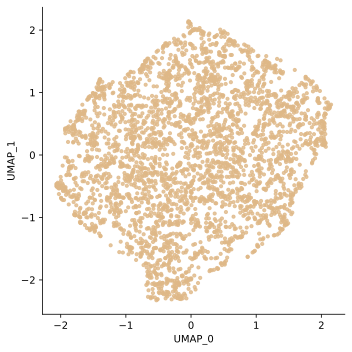

In [18]:
UMAP_emb=UMAP(9, 0.1, "euclidean", data, 1)

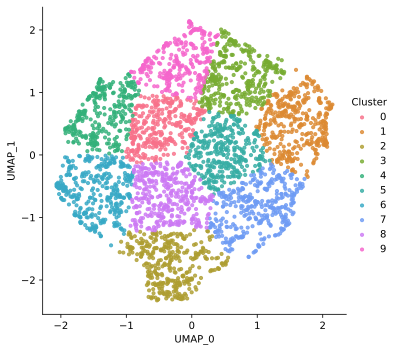

In [19]:
cluster_labels_UMAP_KMEANS,counts_UMAP_KMEANS,silhouette_score_UMAP_KMEANS=Clustering(UMAP_emb, "UMAP", {"n_clusters":10}, "KMEANS", 1)

In [20]:
print("Sihouette Score K-Means-UMAP", silhouette_score_UMAP_KMEANS)

Sihouette Score K-Means-UMAP 0.7319957465898739


### FDC

##### Best parameter choices
UMAP
- n_neighbours=9
- min_dist=0.1

k-Means
- num_clusters=10

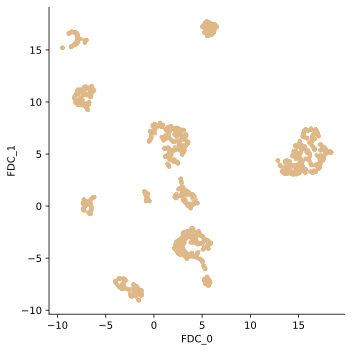

In [21]:
FDC_emb=FDC(data, cont_list, nom_list, ord_list, [[9, 0.1, "euclidean"],[9, 0.1, modified_canberra],[9, 0.1, "hamming"]], 1, 1)

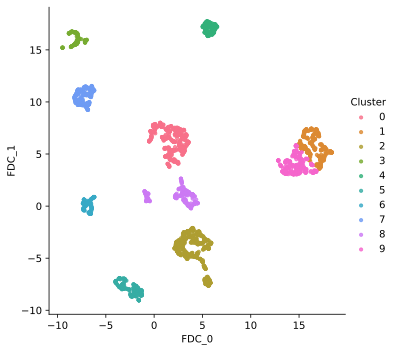

In [22]:
cluster_labels_FDC_KMEANS,counts_FDC_KMEANS,silhouette_score_FDC_KMEANS=Clustering(FDC_emb, "FDC", {"n_clusters":10}, "KMEANS", 1)

In [23]:
print("Sihouette Score K-Means-FDC", silhouette_score_FDC_KMEANS)

Sihouette Score K-Means-FDC 0.8034774065211082


## Compare UMAP and FDC for DBSCAN

### UMAP

##### Best parameter choices
UMAP
- n_neighbours=21
- min_dist=0.01

DBSCAN
- eps=0.1
- min_samples=10

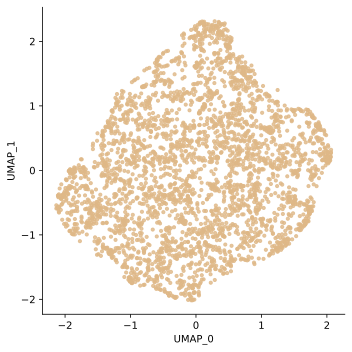

In [24]:
UMAP_emb=UMAP(21, 0.01, "euclidean", data, 1)

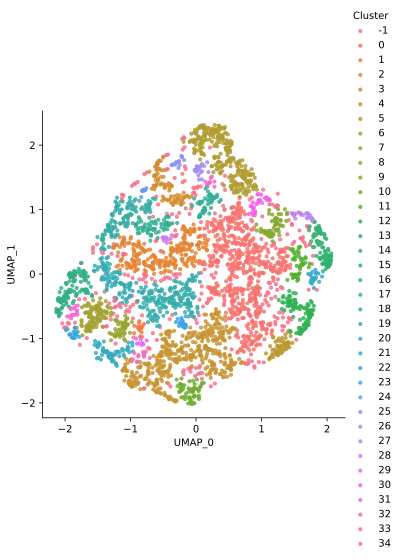

In [25]:
cluster_labels_UMAP_DBSCAN,counts_UMAP_DBSCAN,silhouette_score_UMAP_DBSCAN=Clustering(UMAP_emb, "UMAP", {"eps":0.1,"min_samples":10}, "DBSCAN", 1)

### FDC

##### Best parameter choices
UMAP
- n_neighbours=15
- min_dist=0.001

DBSCAN
- eps=0.1
- min_samples=5

In [ ]:
FDC_emb=FDC(data, cont_list, nom_list, ord_list, [[15, 0.001, "euclidean"],[15, 0.001, modified_canberra],[15, 0.001, "hamming"]], 1, 1)

In [ ]:
cluster_labels_FDC_DBSCAN,counts_FDC_DBSCAN,silhouette_score_FDC_DBSCAN=Clustering(FDC_emb, "FDC", {"eps":0.1,"min_samples":5}, "DBSCAN", 1)

## Compare UMAP and FDC for Agglomerative clustering

### UMAP

In [ ]:
def parameter_optimization_UMAP_AGGLO(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        n_clusters_sample=ranodm.choice(n_clusters)
        linkage_sample=random.choice(linkage)
        metric_sample=random.choice(metric)

        
        UMAP_emb=UMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, 0)
        
        cluster_labels, counts, sil_score=Clustering(UMAP_emb, "UMAP", {"n_clusters":n_clusters_sample,"metric":metric_sample,"linkage":linkage_sample}, "AGGLO",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, n_clusters, metric_sample, linkage_sample, sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [ ]:
n_neighbors = [6, 9, 12, 15, 18, 21, 24, 27, 30]
min_dist= [0.001, 0.01, 0.1]
n_clusters=[2, 3, 4, 5, 6, 7, 8, 9, 10]
linkage=["ward", "complete", "average", "single"]
metric=["euclidean","l1","manhattan","cosine"]

### FDC

In [ ]:
def parameter_optimization_FDC_AGGLO(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        n_clusters_sample=ranodm.choice(n_clusters)
        linkage_sample=random.choice(linkage)
        metric_sample=random.choice(metric)

        
        FDC_emb=FDC(data, cont_list, nom_list, ord_list, [[n_neighbors_sample, min_dist_sample, "euclidean"],[n_neighbors_sample, min_dist_sample, modified_canberra],[n_neighbors_sample, min_dist_sample, "hamming"]], 1, 0)
        
        cluster_labels, counts, sil_score=Clustering(FDC_emb, "FDC",  {"n_clusters": n_clusters_sample,"metric":metric_sample,"linkage":linkage_sample}, "AGGLO",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, linkage_sample, metric_sample,sil_score]
        parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [ ]:
n_neighbors = [6, 9, 12, 15, 18, 21, 24, 27, 30]
min_dist= [0.001, 0.01, 0.1]
n_clusters=[2, 3, 4, 5, 6, 7, 8, 9, 10]
linkage=["ward", "complete", "average", "single"]
metric=["euclidean","l1","manhattan","cosine"]